In [3]:
import matplotlib.pyplot as plt

class Mortgage(object):
    """Abstract class for building different kinds of mortgages"""

    def __init__(self, loan, annRate, months):
        self.loan = loan
        self.rate = annRate / 12.0
        self.months = months
        self.paid = [0.0]
        self.outstanding = [loan]
        self.payment = self.findPayment(loan, self.rate, months)
        self.legend = "Mortgage"

    def findPayment(self, loan, rate, months):
        """Return the monthly payment for a loan."""
        if rate == 0:
            return loan / months
        return loan * (rate * (1 + rate)**months) / ((1 + rate)**months - 1)

    def makePayment(self):
        """Make one monthly payment."""
        self.paid.append(self.payment)
        reduction = self.payment - self.outstanding[-1] * self.rate
        self.outstanding.append(self.outstanding[-1] - reduction)

    def total_paid(self):
        """Return the total amount paid so far."""
        return sum(self.paid)

    def __str__(self):
        return self.legend

    def plotPayments(self, style):
        """Plot the monthly payment (excluding the initial zero)."""
        plt.plot(self.paid[1:], style, label=self.legend)

    def plotBalance(self, style):
        """Plot the remaining balance over time."""
        plt.plot(self.outstanding, style, label=self.legend)

    def plotTotPd(self, style):
        """Plot the cumulative total payments over time."""
        tot_pd = [self.paid[0]]
        for payment in self.paid[1:]:
            tot_pd.append(tot_pd[-1] + payment)
        plt.plot(tot_pd, style, label=self.legend)

    def plotNet(self, style):
        """Plot the net cost (total payments minus equity acquired)."""
        tot_pd = [self.paid[0]]
        for payment in self.paid[1:]:
            tot_pd.append(tot_pd[-1] + payment)
        # Compute equity acquired without NumPy
        equity_acquired = [self.loan - balance for balance in self.outstanding]
        net = [total - eq for total, eq in zip(tot_pd, equity_acquired)]
        plt.plot(net, style, label=self.legend)


def plotMortgages(morts, amt):
    """Plot various metrics for a list of mortgages."""
    styles = ['b-', 'g-', 'r-', 'm-']
    payments_fig = 1
    cost_fig = 2
    balance_fig = 3
    net_cost_fig = 4

    # Plot mortgage data for each mortgage instance
    for i, m in enumerate(morts):
        plt.figure(payments_fig)
        m.plotPayments(styles[i % len(styles)])
        plt.figure(cost_fig)
        m.plotTotPd(styles[i % len(styles)])
        plt.figure(balance_fig)
        m.plotBalance(styles[i % len(styles)])
        plt.figure(net_cost_fig)
        m.plotNet(styles[i % len(styles)])

    # Helper function for labeling plots
    def labelPlot(fig, title, xlabel, ylabel):
        plt.figure(fig)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend(loc='best')

    labelPlot(payments_fig, f'Monthly Payments of ${amt:,} Mortgages', 'Months', 'Monthly Payments')
    labelPlot(cost_fig, f'Cash Outlay of ${amt:,} Mortgages', 'Months', 'Total Payments')
    labelPlot(balance_fig, f'Balance Remaining of ${amt:,} Mortgages', 'Months', 'Remaining Loan Balance')
    labelPlot(net_cost_fig, f'Net cost of ${amt:,} Mortgages', 'Months', 'Payments Equity')
    plt.show()


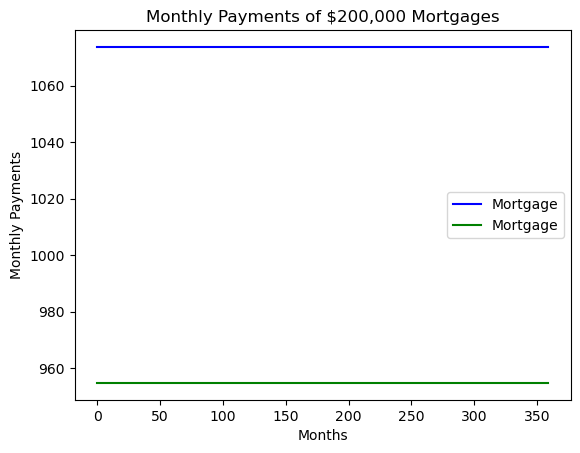

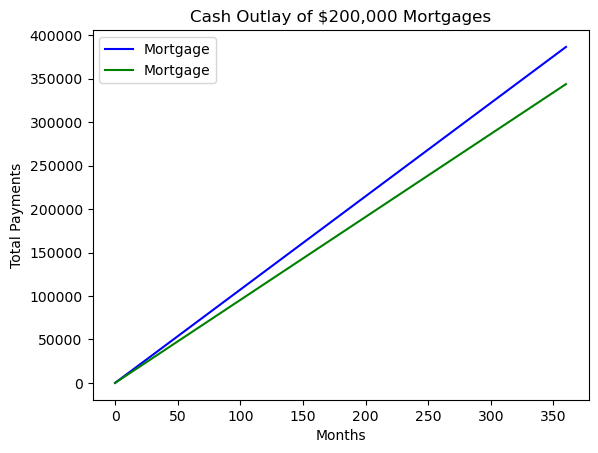

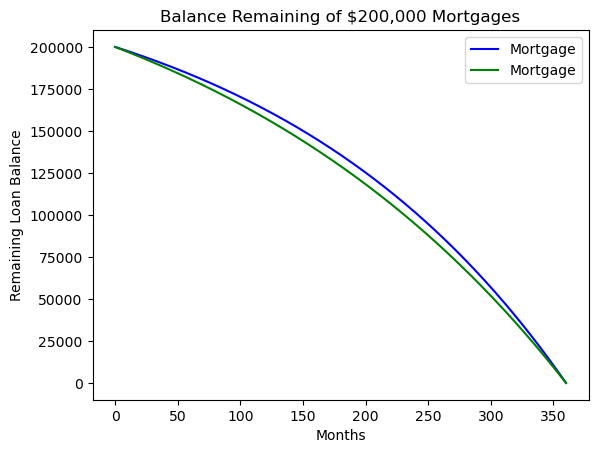

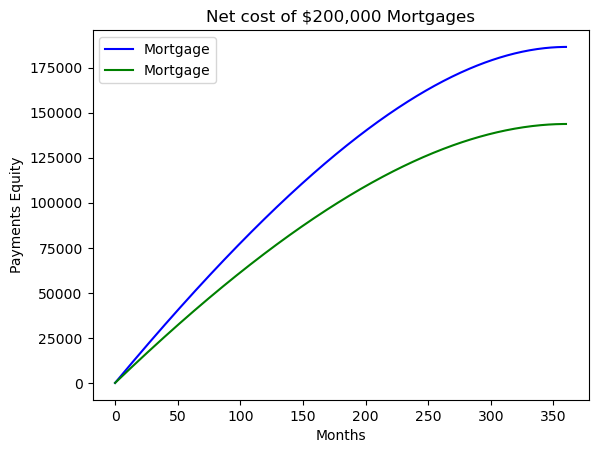

In [4]:
# Create two mortgage instances with different interest rates
mort1 = Mortgage(200000, 0.05, 360)
mort2 = Mortgage(200000, 0.04, 360)

# Simulate the payments for 360 months
for _ in range(360):
    mort1.makePayment()
    mort2.makePayment()

# Use the plotMortgages function to plot the mortgage data
plotMortgages([mort1, mort2], 200000)

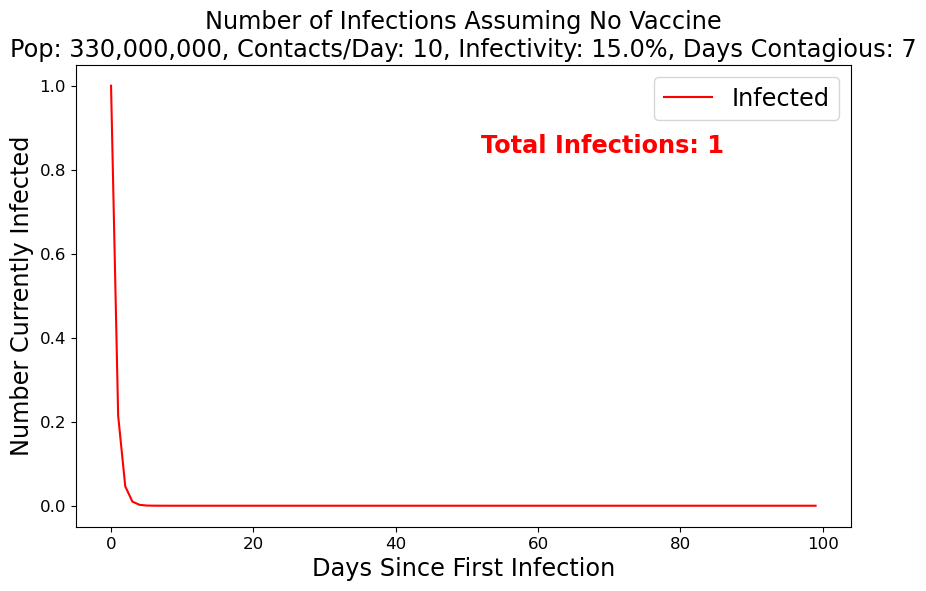

(<matplotlib.lines.Line2D at 0x7f47ec60ca50>,
 Text(51.975, 0.8400000000000001, 'Total Infections: 1'))

In [9]:
import matplotlib.pyplot as plt

def simulate_covid(days, init_contacts, contagiousness, days_spreading, pop):
    """
    Simulate daily new infections.
    A very basic model where each infected person infects 
    (R0/days_spreading) new people per day, with R0 computed from 
    the number of contacts and contagiousness. The spread is limited 
    by the remaining susceptible population.
    """
    infections = [1]         # start with one infection
    total_infections = [1]
    R0 = init_contacts * contagiousness / 100.0
    for day in range(1, days):
        new_inf = infections[-1] * (R0 / days_spreading)
        new_inf = min(new_inf, pop - total_infections[-1])
        infections.append(new_inf)
        total_infections.append(total_infections[-1] + new_inf)
    return infections, total_infections

def plot_infections(infections, total_infections, fixed):
    """
    Plot the infection curve and return plot elements.
    """
    plt.figure(figsize=(10, 6))
    infection_plot, = plt.plot(infections, 'r', label='Infected')  # comma to unpack the Line2D object
    plt.xticks(fontsize='large')
    plt.yticks(fontsize='large')
    plt.xlabel('Days Since First Infection', fontsize='xx-large')
    plt.ylabel('Number Currently Infected', fontsize='xx-large')
    plt.title('Number of Infections Assuming No Vaccine\n' +
              f'Pop: {fixed["pop"]:,}, ' +
              f'Contacts/Day: {fixed["init_contacts"]}, ' +
              f'Infectivity: {fixed["contagiousness"]:.1f}%, ' +
              f'Days Contagious: {fixed["days_spreading"]}',
              fontsize='xx-large')
    plt.legend(fontsize='xx-large')
    txt_box = plt.text(
        plt.xlim()[1]/2,
        plt.ylim()[1]/1.25,
        f'Total Infections: {int(total_infections[-1]):,}',
        fontdict={'size': 'xx-large', 'weight': 'bold', 'color': 'red'}
    )
    return infection_plot, txt_box

def update_plot(days=100, init_contacts=10, contagiousness=15.0, days_spreading=7, pop=330_000_000):
    """
    Run the simulation and plot infections.
    """
    fixed = {
        'pop': pop,
        'init_contacts': init_contacts,
        'contagiousness': contagiousness,
        'days_spreading': days_spreading
    }
    infections, total_infections = simulate_covid(days, init_contacts, contagiousness, days_spreading, pop)
    infection_plot, txt_box = plot_infections(infections, total_infections, fixed)
    plt.show()
    return infection_plot, txt_box

# Run the simulation with default parameters
update_plot()
